# Notebook para o treinamento de classificação de intenções

## Visão Geral

Este notebook implementa um **sistema completo de classificação automática de intenções** em mensagens de atendimento ao cliente. O sistema é capaz de analisar uma mensagem recebida (como "Onde está meu pedido?" ou "Quero trocar este produto") e identificar automaticamente qual é a intenção do cliente, facilitando o direcionamento correto e a resposta adequada.

## Objetivo do Projeto

**Problema**: Em sistemas de atendimento ao cliente, é comum receber centenas ou milhares de mensagens diárias que precisam ser categorizadas e direcionadas para os setores apropriados. Fazer isso manualmente é demorado e sujeito a erros.

**Solução**: Desenvolvemos um sistema de machine learning que automaticamente classifica mensagens em 16 categorias diferentes de intenção, como:
- Dúvidas sobre produtos
- Rastreamento de pedidos  
- Solicitações de troca/devolução
- Agradecimentos
- Problemas técnicos
- E muito mais...

## Como o Sistema Funciona

### 1. **Processamento de Linguagem Natural**
- Utilizamos o modelo **BERT português** (`neuralmind/bert-base-portuguese-cased`) para converter mensagens em texto para vetores numéricos (embeddings)
- Estes vetores capturam o significado semântico das palavras e frases em português

### 2. **Classificação com Machine Learning**
- Um algoritmo **Random Forest** (floresta aleatória) aprende padrões nos vetores para classificar as intenções
- O modelo é treinado com dados históricos já categorizados manualmente

### 3. **Pipeline Automatizado**
- O sistema combina as duas etapas em um pipeline único e fácil de usar
- Para cada nova mensagem, gera o embedding e faz a classificação automaticamente

## Arquitetura do Sistema

```
[Mensagem] → [BERT Embeddings] → [Random Forest] → [Classificação + Confiança]
```

### Componentes Principais:

1. **`IntencaoEnum`**: Define todas as 16 categorias de intenção possíveis
2. **`GeradorEmbeddings`**: Converte textos em vetores usando BERT
3. **`ClassificadorIntencoesRandomForest`**: Modelo Random Forest para classificação
4. **`PipelineClassificacaoIntencoes`**: Interface unificada que combina tudo

## Execução Flexível: Notebook vs Produção

Este código foi desenvolvido de forma **modular e flexível**, permitindo execução tanto em ambiente de desenvolvimento (notebook) quanto em sistemas de produção.

### **No Ambiente de Desenvolvimento (Este Notebook)**:
- **Análise exploratória**: Visualizações e estatísticas dos dados
- **Experimentação**: Teste diferentes parâmetros e modelos
- **Validação**: Métricas detalhadas e análise de erros
- **Prototipagem rápida**: Teste imediato de novas mensagens

### **Em Ambiente de Produção**:
O código pode ser facilmente adaptado para produção seguindo estas estratégias:

#### **Opção 1: API REST** (Recomendada)
```python
# Exemplo de integração com FastAPI
from fastapi import FastAPI
app = FastAPI()

@app.post("/classificar")
def classificar_mensagem(mensagem: str):
    resultado = pipeline.classificar_mensagem(mensagem)
    return resultado
```

#### **Opção 2: Processamento em Lote**
```python
# Script para processar arquivos CSV em lote
def processar_arquivo(caminho_entrada, caminho_saida):
    df = pd.read_csv(caminho_entrada)
    df['intencao'] = df['mensagem'].apply(lambda x: pipeline.classificar_mensagem(x))
    df.to_csv(caminho_saida)
```

#### **Opção 3: Integração com Sistemas Existentes**
- **Webhooks**: Receber mensagens via HTTP e retornar classificações
- **Filas de mensagens**: Integração com RabbitMQ, Kafka, etc.
- **Bancos de dados**: Classificar mensagens diretamente no banco
- **Chatbots**: Integração com plataformas como WhatsApp, Telegram

### **Adaptações Necessárias para Produção**:

1. **Remoção de Dependências do Colab**:
   - Substituir `google.colab.drive` por carregamento local de arquivos
   - Adaptar caminhos de arquivos para o ambiente alvo

2. **Otimização de Performance**:
   - Cache de embeddings para mensagens similares
   - Carregamento único do modelo na inicialização
   - Processamento em lote quando possível

3. **Monitoramento e Logs**:
   - Adicionar logging estruturado
   - Métricas de performance (tempo de resposta, acurácia)
   - Alertas para classificações com baixa confiança

4. **Segurança e Robustez**:
   - Validação de entrada
   - Tratamento de exceções
   - Rate limiting
   - Autenticação/autorização

## Dataset e Treinamento

### **Fonte dos Dados**:
- Arquivo CSV com mensagens reais já categorizadas manualmente
- Localização: Google Drive compartilhado (`/content/drive/Shareddrives/nsync_m11/sprint2/`)

### **Estrutura dos Dados**:
- **`mensagem`**: Texto da mensagem do cliente
- **`categoria`**: Intenção classificada (uma das 16 categorias)
- **`confianca`**: Nível de certeza da classificação manual

### **Processo de Treinamento**:
1. **Análise exploratória**: Entender distribuição e características dos dados
2. **Geração de embeddings**: Converter todas as mensagens em vetores
3. **Divisão dos dados**: 80% treino, 20% teste
4. **Treinamento**: Random Forest com validação cruzada
5. **Avaliação**: Métricas detalhadas no conjunto de teste

## Categorias de Intenção

O sistema classifica mensagens em 16 categorias principais:

| Código | Nome Legível | Exemplo |
|--------|--------------|---------|
| `duvida_produto` | Dúvida sobre Produto | "Este produto é resistente à água?" |
| `rastreamento_pedido` | Rastreamento de Pedido | "Onde está meu pedido #123?" |
| `troca_devolucao` | Troca/Devolução | "Quero trocar por outro tamanho" |
| `agradecimento` | Agradecimento | "Muito obrigada pela ajuda!" |
| `saudacao` | Saudação | "Bom dia, como estão?" |
| `problema_tecnico` | Problema Técnico | "O app não está funcionando" |
| ... | ... | ... |

## Métricas de Performance

O sistema gera métricas detalhadas para avaliar sua performance:

- **Acurácia geral**: Percentual de acertos
- **Precision/Recall por categoria**: Qualidade da classificação de cada intenção
- **Matriz de confusão**: Visualização dos erros de classificação
- **Análise de confiança**: Distribuição das probabilidades preditas

## Como Usar Este Notebook

### **Passo 1: Configuração**
Execute as células de import e definição de classes

### **Passo 2: Carregamento de Dados**
```python
df = carregar_dados_taxonomia()
analisar_dataset(df)  # Visualizações e estatísticas
```

### **Passo 3: Treinamento**
```python
# Gerar embeddings
gerador = GeradorEmbeddings()
X_embeddings = gerador.gerar_embeddings_lote(df['mensagem'].tolist())

# Treinar modelo
classificador = ClassificadorIntencoesRandomForest()
classificador.treinar(X_train, y_train)
```

### **Passo 4: Teste e Validação**
```python
# Avaliar performance
y_pred = classificador.predizer(X_test)
avaliar_modelo(y_test, y_pred, classificador.classes_)
```

### **Passo 5: Uso Prático**
```python
# Criar pipeline e testar
pipeline = PipelineClassificacaoIntencoes(gerador, classificador)
resultado = pipeline.classificar_mensagem("Sua mensagem aqui")
print(f"Intenção: {resultado['intencao_legivel']}")
```

## 🔧 Tecnologias Utilizadas

- **Python 3.8+**: Linguagem principal
- **Transformers (HuggingFace)**: Modelo BERT para embeddings
- **Scikit-learn**: Random Forest e métricas de avaliação
- **Pandas**: Manipulação de dados
- **NumPy**: Computação numérica
- **Matplotlib/Seaborn**: Visualizações
- **PyTorch**: Backend para modelos transformer

## Considerações Importantes

1. **Dependência de GPU**: O modelo BERT funciona melhor com GPU, mas também roda em CPU
2. **Tamanho do modelo**: O BERT ocupa ~400MB em memória
3. **Tempo de processamento**: ~100ms por mensagem (pode variar conforme hardware)
4. **Qualidade dos dados**: Performance depende da qualidade das classificações manuais
5. **Atualização periódica**: Modelo deve ser retreinado com novos dados regularmente

LINK DO MODELO DEPLOYADO NO HUGGING FACE: https://huggingface.co/itman-inteli/nsync-sprint2-classificador-intencoes/tree/main

In [53]:
# Objetivo: Carrega bibliotecas essenciais para processamento de dados, machine learning, visualizações e processamento de linguagem natural.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from transformers import AutoTokenizer, AutoModel
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from safetensors.numpy import save_file, load_file
import json
import xgboost as xgb
import torch
import pickle
import os
from typing import List, Dict, Tuple
from enum import Enum
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

Objetivo: Define todas as categorias de intenção possíveis do sistema de atendimento.
Funcionalidades:
- Centraliza as categorias em um local
- Método get_readable_name() converte códigos em nomes legíveis
- Garante consistência nas categorias utilizadas

In [54]:
class IntencaoEnum(Enum):
    DUVIDA_PRODUTO = "duvida_produto"
    SOLICITACAO_INFORMACAO = "solicitacao_informacao"
    REACAO_EMOCIONAL = "reacao_emocional"
    INTERESSE_PRODUTO = "interesse_produto"
    AGRADECIMENTO = "agradecimento"
    RASTREAMENTO_PEDIDO = "rastreamento_pedido"
    SAUDACAO = "saudacao"
    SOLICITACAO_CONTATO = "solicitacao_contato"
    MENSAGEM_SISTEMA = "mensagem_sistema"
    TROCA_DEVOLUCAO = "troca_devolucao"
    PROBLEMA_TECNICO = "problema_tecnico"
    NAO_IDENTIFICADO = "nao_identificado"
    REPOSICAO_ESTOQUE = "reposicao_estoque"
    CONFIRMACAO = "confirmacao"
    PARCERIA_COMERCIAL = "parceria_comercial"
    EVENTO_PRESENCIAL = "evento_presencial"

    @classmethod
    def get_readable_name(cls, categoria: str) -> str:
        """Retorna nome legível para a categoria."""
        mapping = {
            "duvida_produto": "Dúvida sobre Produto",
            "solicitacao_informacao": "Solicitação de Informação",
            "reacao_emocional": "Reação Emocional",
            "interesse_produto": "Interesse em Produto",
            "agradecimento": "Agradecimento",
            "rastreamento_pedido": "Rastreamento de Pedido",
            "saudacao": "Saudação",
            "solicitacao_contato": "Solicitação de Contato",
            "mensagem_sistema": "Mensagem do Sistema",
            "troca_devolucao": "Troca/Devolução",
            "problema_tecnico": "Problema Técnico",
            "nao_identificado": "Não Identificado",
            "reposicao_estoque": "Reposição de Estoque",
            "confirmacao": "Confirmação",
            "parceria_comercial": "Parceria Comercial",
            "evento_presencial": "Evento Presencial"
        }
        return mapping.get(categoria, categoria)

Objetivo: Carrega dataset de mensagens categorizadas do Google Drive compartilhado.  
Processo:
- Monta Google Drive
- Carrega CSV de classificações
- Valida colunas obrigatórias
- Remove registros com dados faltantes
- Verifica categorias válidas

Retorna: DataFrame limpo com colunas mensagem, categoria, confianca.

In [55]:
def carregar_dados_taxonomia() -> pd.DataFrame:
    """
    Carrega e preprocessa os dados de taxonomia do CSV.

    Returns:
        pd.DataFrame: Dataset limpo e validado
    """
    try:
        from google.colab import drive
        drive.mount('/content/drive')

        shared_drive_path = '/content/drive/Shareddrives/nsync_m11/sprint2/'
        file_path = os.path.join(shared_drive_path, 'classificacao_taxonomia.csv')

        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            print(f"Arquivo '{file_path}' carregado com sucesso!")
        else:
            print(f"Erro: Arquivo '{file_path}' não encontrado.")
            print("Por favor, verifique se o caminho e o nome do arquivo estão corretos.")

        required_columns = ['mensagem', 'categoria', 'confianca']
        if not all(col in df.columns for col in required_columns):
            raise ValueError(f"Colunas obrigatórias não encontradas: {required_columns}")

        df_clean = df.dropna(subset=['mensagem', 'categoria'])

        categorias_validas = [item.value for item in IntencaoEnum]
        categorias_invalidas = set(df_clean['categoria']) - set(categorias_validas)
        if categorias_invalidas:
            print(f"Aviso: Categorias não reconhecidas encontradas: {categorias_invalidas}")

        print(f"Dados carregados: {len(df_clean)} exemplos válidos")
        return df_clean

    except Exception as e:
        print(f"Erro ao carregar dados: {str(e)}")
        raise

Objetivo: Gera insights sobre a distribuição e características do dataset.  
Análises Realizadas:
- Distribuição de categorias
- Estatísticas de tamanho das mensagens
- Número médio de palavras
- Visualizações: barras, pizza, histogramas
- Exemplos por categoria

In [56]:
def analisar_dataset(df: pd.DataFrame) -> None:
    """
    Realiza análise exploratória do dataset.

    Args:
        df (pd.DataFrame): Dataset para análise
    """
    print("\nDistribuição das Categorias:")
    distribuicao = df['categoria'].value_counts()
    print(distribuicao)

    print(f"\nTotal de exemplos: {len(df)}")
    print(f"Número de categorias: {len(df['categoria'].unique())}")

    # Estatísticas das mensagens
    df['tamanho_mensagem'] = df['mensagem'].str.len()
    df['num_palavras'] = df['mensagem'].str.split().str.len()

    print(f"\nEstatísticas das mensagens:")
    print(f"Tamanho médio (caracteres): {df['tamanho_mensagem'].mean():.1f}")
    print(f"Número médio de palavras: {df['num_palavras'].mean():.1f}")
    print(f"Mensagem mais longa: {df['tamanho_mensagem'].max()} caracteres")
    print(f"Mensagem mais curta: {df['tamanho_mensagem'].min()} caracteres")

    # Visualizações
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Gráfico de barras das categorias
    distribuicao.plot(kind='bar', ax=axes[0,0])
    axes[0,0].set_title('Distribuição das Categorias')
    axes[0,0].set_xlabel('Categoria')
    axes[0,0].set_ylabel('Quantidade')
    axes[0,0].tick_params(axis='x', rotation=45)

    # Gráfico de pizza (top 10)
    distribuicao.head(10).plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%')
    axes[0,1].set_title('Top 10 Categorias - Proporção')
    axes[0,1].set_ylabel('')

    # Histograma do tamanho das mensagens
    axes[1,0].hist(df['tamanho_mensagem'], bins=30, alpha=0.7)
    axes[1,0].set_title('Distribuição do Tamanho das Mensagens')
    axes[1,0].set_xlabel('Número de Caracteres')
    axes[1,0].set_ylabel('Frequência')

    # Histograma do número de palavras
    axes[1,1].hist(df['num_palavras'], bins=20, alpha=0.7)
    axes[1,1].set_title('Distribuição do Número de Palavras')
    axes[1,1].set_xlabel('Número de Palavras')
    axes[1,1].set_ylabel('Frequência')

    plt.tight_layout()
    plt.show()

    # Exemplos por categoria (top 5)
    print("\nExemplos por categoria (top 5):")
    for categoria in distribuicao.head(5).index:
        exemplos = df[df['categoria'] == categoria]['mensagem'].head(3).tolist()
        nome_legivel = IntencaoEnum.get_readable_name(categoria)
        print(f"\n{nome_legivel.upper()} ({categoria}):")
        for ex in exemplos:
            print(f"  • {ex}")

Modelo Padrão: neuralmind/bert-base-portuguese-cased  
Métodos Principais:
- gerar_embedding(texto): Converte texto único em vetor numérico
- gerar_embeddings_lote(textos): Processa lista de textos em batch

Características:
- Detecta automaticamente GPU/CPU
- Trunca textos em 128 tokens
- Usa pooling médio dos hidden states
- Processa em lotes para eficiência

In [57]:
class GeradorEmbeddings:
    """
    Gerador de embeddings usando modelos transformer do HuggingFace.
    """

    def __init__(self, model_name: str = "neuralmind/bert-base-portuguese-cased"):
        """
        Inicializa o gerador de embeddings.

        Args:
            model_name (str): Nome do modelo no HuggingFace Hub
        """
        self.model_name = model_name
        print(f"Carregando modelo: {model_name}")

        # Detectar dispositivo (GPU/CPU)
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"Usando dispositivo: {self.device}")

        # Carregar tokenizer e modelo
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = AutoModel.from_pretrained(model_name).to(self.device)
        self.model.eval()

    def gerar_embedding(self, texto: str) -> np.ndarray:
        """
        Gera embedding para um texto individual.

        Args:
            texto (str): Texto para gerar embedding

        Returns:
            np.ndarray: Vetor de embedding
        """
        # Tokenizar
        inputs = self.tokenizer(
            texto,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=128
        ).to(self.device)

        # Gerar embedding
        with torch.no_grad():
            outputs = self.model(**inputs)
            # Usar pooling médio dos hidden states
            embedding = outputs.last_hidden_state.mean(dim=1).squeeze()

        return embedding.cpu().numpy()

    def gerar_embeddings_lote(self, textos: List[str]) -> np.ndarray:
        """
        Gera embeddings para uma lista de textos.

        Args:
            textos (List[str]): Lista de textos

        Returns:
            np.ndarray: Matriz de embeddings
        """
        embeddings = []
        total = len(textos)

        print(f"Gerando embeddings para {total} textos...")
        for i, texto in enumerate(textos):
            if i % 100 == 0:
                print(f"   Processando: {i+1}/{total}")

            embedding = self.gerar_embedding(texto)
            embeddings.append(embedding)

        print("Embeddings gerados com sucesso!")
        return np.array(embeddings)

Configuração:
- Random Forest com 100 árvores (padrão)
- class_weight='balanced' para desbalanceamento
- Processamento paralelo (n_jobs=-1)

Métodos Principais:
- treinar(): Treina modelo com validação cruzada 5-fold
- predizer(): Faz predições de classe
- predizer_probabilidade(): Retorna probabilidades
- salvar_modelo() / carregar_modelo(): Persistência

In [58]:
class ClassificadorIntencoesRandomForest:
    """
    Classificador de intenções usando Random Forest + embeddings.
    """

    def __init__(self, n_estimators: int = 100, random_state: int = 42):
        """
        Inicializa o classificador.

        Args:
            n_estimators (int): Número de árvores no Random Forest
            random_state (int): Seed para reprodutibilidade
        """
        self.modelo = RandomForestClassifier(
            n_estimators=n_estimators,
            random_state=random_state,
            n_jobs=-1,
            class_weight='balanced'  # Para lidar com desbalanceamento
        )
        self.classes_ = None
        self.feature_importance_ = None

    def treinar(self, X: np.ndarray, y: np.ndarray) -> Dict:
        """
        Treina o modelo e retorna métricas de validação cruzada.

        Args:
            X (np.ndarray): Features (embeddings)
            y (np.ndarray): Labels (intenções)

        Returns:
            Dict: Métricas de treinamento
        """
        print("Iniciando treinamento...")

        # Validação cruzada
        cv_scores = cross_val_score(self.modelo, X, y, cv=5, scoring='accuracy')

        # Treinar modelo final
        self.modelo.fit(X, y)
        self.classes_ = self.modelo.classes_
        self.feature_importance_ = self.modelo.feature_importances_

        metricas = {
            'cv_accuracy_mean': cv_scores.mean(),
            'cv_accuracy_std': cv_scores.std(),
            'n_features': X.shape[1],
            'n_samples': X.shape[0]
        }

        print("Treinamento concluído!")
        print(f"Acurácia CV: {metricas['cv_accuracy_mean']:.3f} ± {metricas['cv_accuracy_std']:.3f}")

        return metricas

    def predizer(self, X: np.ndarray) -> np.ndarray:
        """Faz predições."""
        return self.modelo.predict(X)

    def predizer_probabilidade(self, X: np.ndarray) -> np.ndarray:
        """Retorna probabilidades das predições."""
        return self.modelo.predict_proba(X)

    def salvar_modelo(self, caminho: str) -> None:
        """Salva o modelo treinado."""
        with open(caminho, 'wb') as f:
            pickle.dump(self.modelo, f)
        print(f"Modelo salvo em: {caminho}")

    def carregar_modelo(self, caminho: str) -> None:
        """Carrega modelo salvo."""
        with open(caminho, 'rb') as f:
            self.modelo = pickle.load(f)
        self.classes_ = self.modelo.classes_
        print(f"Modelo carregado de: {caminho}")

Configuração:
- Suport Vector Machine
- Usa 'rbf', C=1.0, gamma com 'scale'
- Aplica balanceamento

Métodos Principais:
- treinar(): Treina modelo com validação cruzada
- predizer(): Faz predições de classe
- predizer_probabilidade(): Retorna probabilidades
- salvar_modelo() / carregar_modelo(): Persistência

In [59]:
class ClassificadorIntencoesSVM:
    """Classificador SVM para intenções."""

    def __init__(self, random_state: int = 42):
        self.scaler = StandardScaler()
        self.modelo = SVC(
            kernel='rbf',
            C=1.0,
            gamma='scale',
            probability=True,
            class_weight='balanced',
            random_state=random_state
        )
        self.classes_ = None

    def treinar(self, X: np.ndarray, y: np.ndarray) -> Dict:
        print("Iniciando treinamento SVM...")

        # Normalizar features (importante para SVM)
        X_scaled = self.scaler.fit_transform(X)

        # Validação cruzada
        cv_scores = cross_val_score(self.modelo, X_scaled, y, cv=5, scoring='accuracy')

        # Treinar modelo final
        self.modelo.fit(X_scaled, y)
        self.classes_ = self.modelo.classes_

        metricas = {
            'cv_accuracy_mean': cv_scores.mean(),
            'cv_accuracy_std': cv_scores.std(),
            'n_features': X.shape[1],
            'n_samples': X.shape[0]
        }

        print("Treinamento SVM concluído!")
        print(f"Acurácia CV: {metricas['cv_accuracy_mean']:.3f} ± {metricas['cv_accuracy_std']:.3f}")

        return metricas

    def predizer(self, X: np.ndarray) -> np.ndarray:
        X_scaled = self.scaler.transform(X)
        return self.modelo.predict(X_scaled)

    def predizer_probabilidade(self, X: np.ndarray) -> np.ndarray:
        X_scaled = self.scaler.transform(X)
        return self.modelo.predict_proba(X_scaled)

    def salvar_modelo(self, caminho: str) -> None:
        modelo_completo = {
            'svm': self.modelo,
            'scaler': self.scaler,
            'classes_': self.classes_
        }
        with open(caminho, 'wb') as f:
            pickle.dump(modelo_completo, f)
        print(f"Modelo SVM salvo em: {caminho}")

    def carregar_modelo(self, caminho: str) -> None:
        with open(caminho, 'rb') as f:
            modelo_completo = pickle.load(f)
        self.modelo = modelo_completo['svm']
        self.scaler = modelo_completo['scaler']
        self.classes_ = modelo_completo['classes_']
        print(f"Modelo SVM carregado de: {caminho}")

Objetivo: Integra geração de embeddings + classificação em interface única.  
Métodos:
- classificar_mensagem(): Classifica mensagem única com detalhes
- classificar_lote(): Classifica múltiplas mensagens

In [60]:
class PipelineClassificacaoIntencoes:
    """
    Pipeline completo para classificação de intenções.
    Combina geração de embeddings + classificação Random Forest.
    """

    def __init__(self, gerador_embeddings: GeradorEmbeddings,
                 classificador: ClassificadorIntencoesRandomForest):
        """
        Inicializa o pipeline.

        Args:
            gerador_embeddings: Instância do gerador de embeddings
            classificador: Instância do classificador treinado
        """
        self.gerador_embeddings = gerador_embeddings
        self.classificador = classificador

    def classificar_mensagem(self, mensagem: str) -> Dict:
        """
        Classifica uma mensagem e retorna resultado detalhado.

        Args:
            mensagem (str): Mensagem para classificar

        Returns:
            Dict: Resultado da classificação com probabilidades
        """
        embedding = self.gerador_embeddings.gerar_embedding(mensagem)
        embedding = embedding.reshape(1, -1)

        predicao = self.classificador.predizer(embedding)[0]
        probabilidades = self.classificador.predizer_probabilidade(embedding)[0]

        resultado = {
            'mensagem': mensagem,
            'intencao_predita': predicao,
            'intencao_legivel': IntencaoEnum.get_readable_name(predicao),
            'confianca': max(probabilidades),
            'todas_probabilidades': dict(zip(self.classificador.classes_, probabilidades))
        }

        return resultado

    def classificar_lote(self, mensagens: List[str]) -> List[Dict]:
        """
        Classifica múltiplas mensagens.

        Args:
            mensagens (List[str]): Lista de mensagens

        Returns:
            List[Dict]: Lista de resultados
        """
        return [self.classificar_mensagem(msg) for msg in mensagens]

Métricas Geradas:  

- Acurácia geral
- Classification report (precision, recall, f1-score)
- Matriz de confusão com heatmap
- Análise dos 5 primeiros erros de classificação

In [61]:
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    precision_recall_fscore_support, cohen_kappa_score,
    balanced_accuracy_score
)

def avaliar_modelo(y_true: np.ndarray, y_pred: np.ndarray, classes: np.ndarray) -> None:
    """
    Realiza avaliação completa do modelo.

    Args:
        y_true: Labels verdadeiros
        y_pred: Predições do modelo
        classes: Classes do modelo
    """
    # Métricas básicas
    accuracy = accuracy_score(y_true, y_pred)
    balanced_acc = balanced_accuracy_score(y_true, y_pred)
    kappa = cohen_kappa_score(y_true, y_pred)

    print(f"Acurácia: {accuracy:.3f}")
    print(f"Acurácia Balanceada: {balanced_acc:.3f}")
    print(f"Kappa Score: {kappa:.3f}")

    # Métricas agregadas
    precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(
        y_true, y_pred, average='macro'
    )
    precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(
        y_true, y_pred, average='weighted'
    )

    print(f"\nPrecision (Macro): {precision_macro:.3f}")
    print(f"Recall (Macro): {recall_macro:.3f}")
    print(f"F1-Score (Macro): {f1_macro:.3f}")
    print(f"Precision (Weighted): {precision_weighted:.3f}")
    print(f"Recall (Weighted): {recall_weighted:.3f}")
    print(f"F1-Score (Weighted): {f1_weighted:.3f}")

    print("\nRelatório de Classificação:")
    print(classification_report(y_true, y_pred))

    plt.figure(figsize=(12, 10))
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[IntencaoEnum.get_readable_name(c) for c in classes],
                yticklabels=[IntencaoEnum.get_readable_name(c) for c in classes])
    plt.title('Matriz de Confusão')
    plt.xlabel('Predição')
    plt.ylabel('Real')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    erros_idx = np.where(y_true != y_pred)[0]
    if len(erros_idx) > 0:
        print(f"\nAnálise de erros ({len(erros_idx)} exemplos):")
        for i in erros_idx[:5]:
            print(f"   Real: {IntencaoEnum.get_readable_name(y_true[i])}")
            print(f"   Predito: {IntencaoEnum.get_readable_name(y_pred[i])}")
            print()

Fluxo de Execução:

- Carregamento: Dados do CSV + análise exploratória
- Embeddings: Geração de vetores com BERT português
- Divisão: 80% treino, 20% teste (estratificado)
- Treinamento: Random Forest com validação cruzada
- Avaliação: Métricas detalhadas no conjunto de teste
- Persistência: Salva modelo treinado
- Demo: Testa pipeline com exemplos práticos

=== CARREGAMENTO E ANÁLISE DOS DADOS ===
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Arquivo '/content/drive/Shareddrives/nsync_m11/sprint2/classificacao_taxonomia.csv' carregado com sucesso!
Dados carregados: 1439 exemplos válidos

Distribuição das Categorias:
categoria
nao_identificado          333
reacao_emocional          181
agradecimento             158
saudacao                  116
mensagem_sistema          109
troca_devolucao            82
solicitacao_informacao     78
duvida_produto             75
confirmacao                75
rastreamento_pedido        59
parceria_comercial         36
reposicao_estoque          33
solicitacao_contato        32
problema_tecnico           27
interesse_produto          26
evento_presencial          19
Name: count, dtype: int64

Total de exemplos: 1439
Número de categorias: 16

Estatísticas das mensagens:
Tamanho médio (caracteres): 49.7
Número médio de palavras:

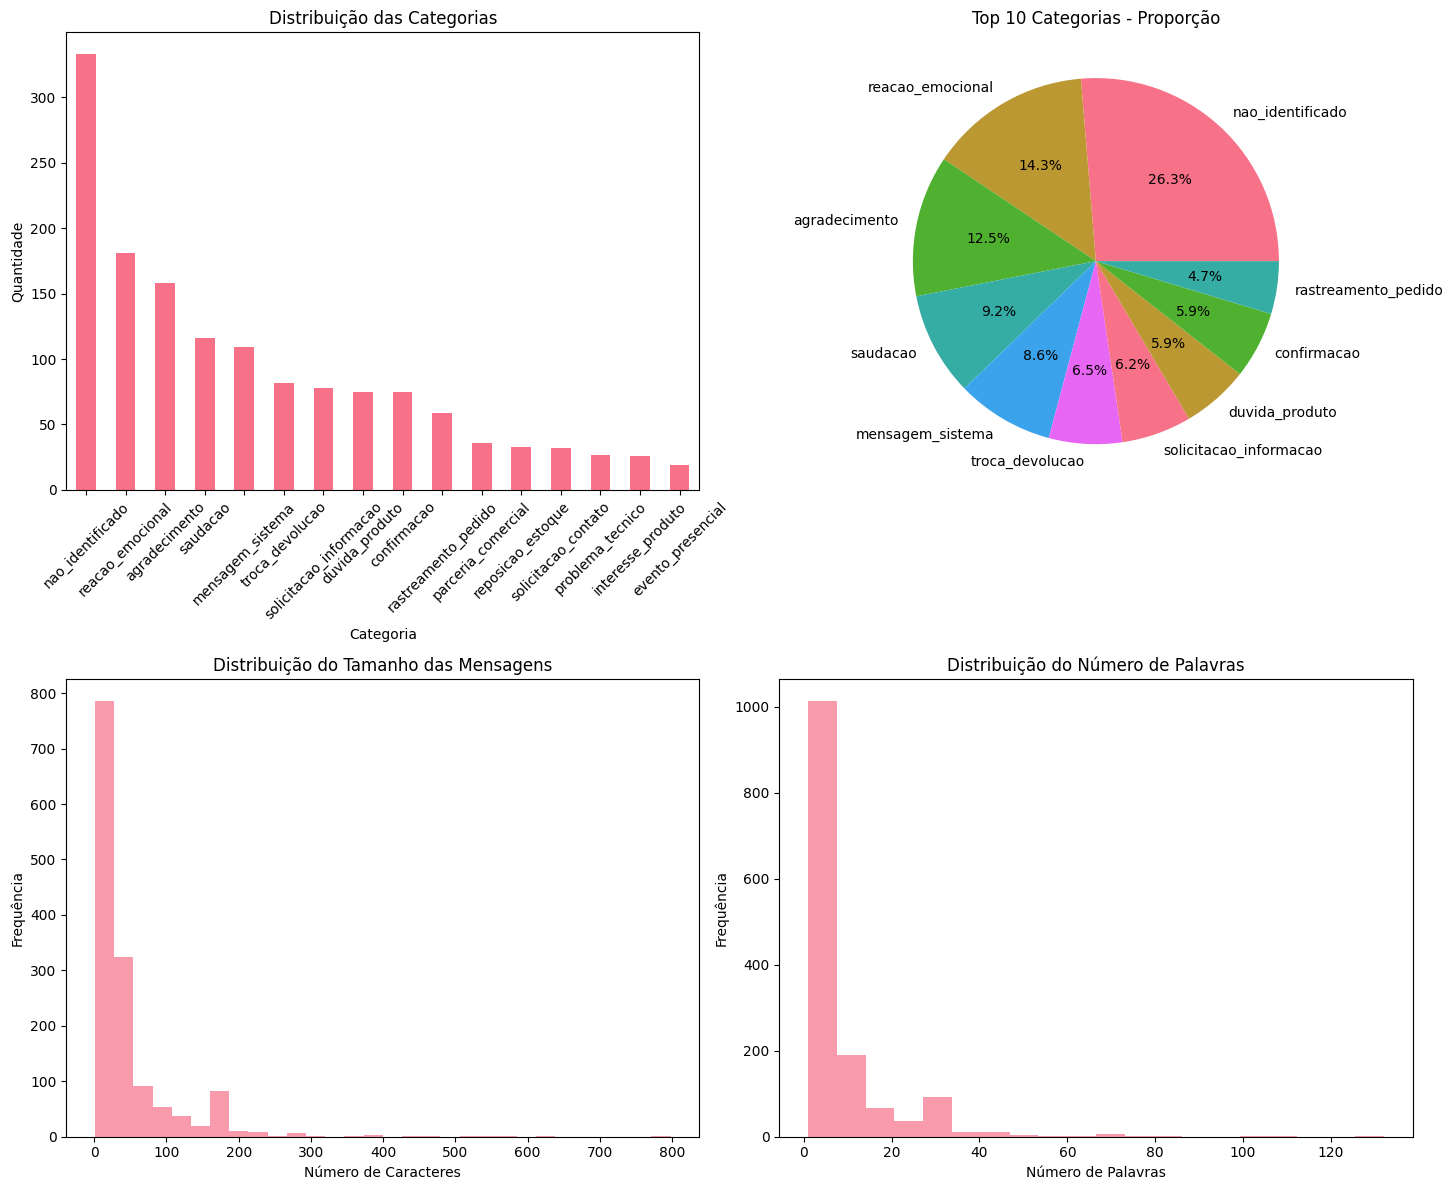


Exemplos por categoria (top 5):

NÃO IDENTIFICADO (nao_identificado):
  • qual foi a mensagem?
  • na verdade foi o porteiro, rs!
  • bia sent an attachment.

REAÇÃO EMOCIONAL (reacao_emocional):
  • yes!!
  • 37?? não creio
  • maravilha

AGRADECIMENTO (agradecimento):
  • obrigada ana!!
  • obrigada
  • obrigada

SAUDAÇÃO (saudacao):
  • olá
  • bom dia
  • bom dia

MENSAGEM DO SISTEMA (mensagem_sistema):
  • adriana shared a product.
  • andrea sent an attachment.
  • bia sent an attachment.

=== GERAÇÃO DE EMBEDDINGS ===
Carregando modelo: neuralmind/bert-base-portuguese-cased
Usando dispositivo: cuda
Gerando embeddings para 1439 textos...
   Processando: 1/1439
   Processando: 101/1439
   Processando: 201/1439
   Processando: 301/1439
   Processando: 401/1439
   Processando: 501/1439
   Processando: 601/1439
   Processando: 701/1439
   Processando: 801/1439
   Processando: 901/1439
   Processando: 1001/1439
   Processando: 1101/1439
   Processando: 1201/1439
   Processando: 1301/

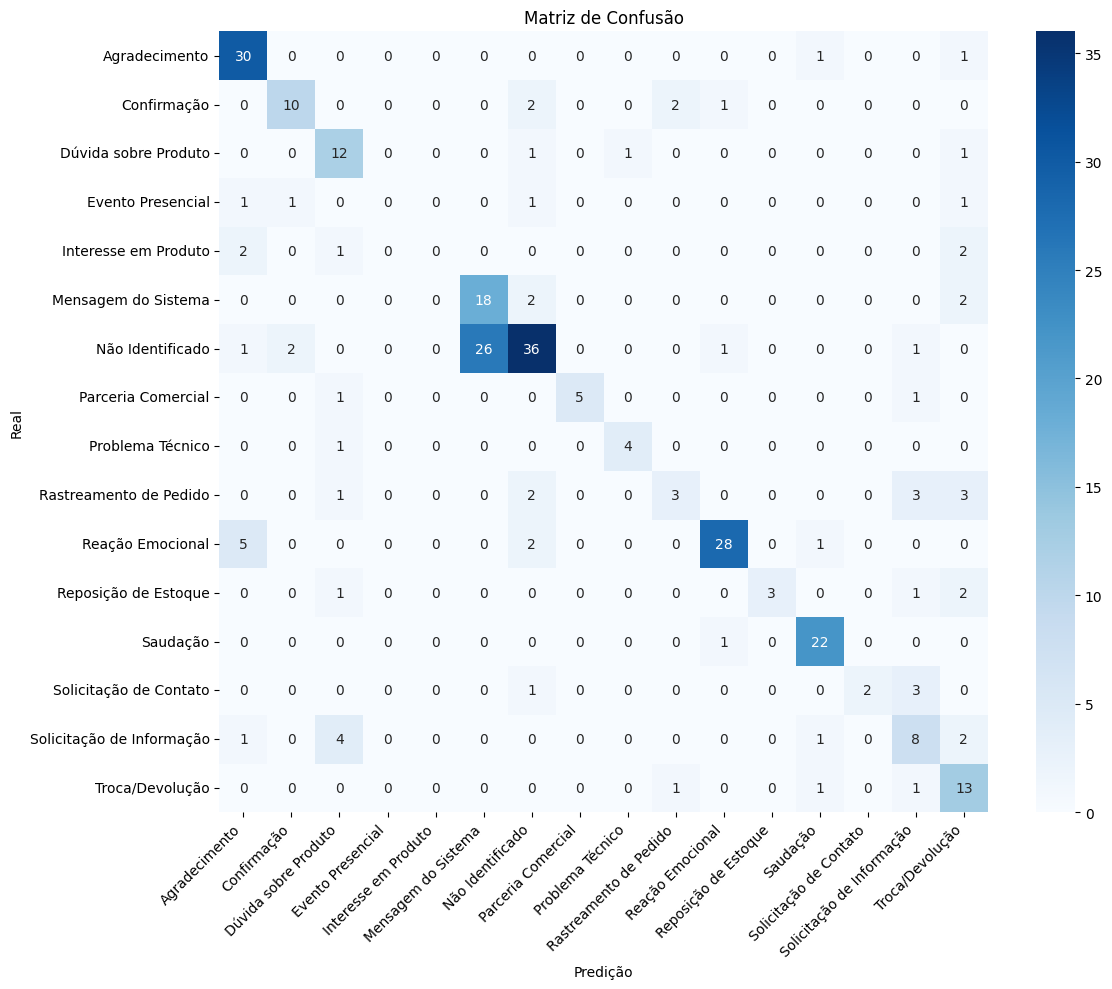


Análise de erros (94 exemplos):
   Real: Dúvida sobre Produto
   Predito: Problema Técnico

   Real: Confirmação
   Predito: Não Identificado

   Real: Evento Presencial
   Predito: Troca/Devolução

   Real: Mensagem do Sistema
   Predito: Troca/Devolução

   Real: Interesse em Produto
   Predito: Dúvida sobre Produto


=== AVALIAÇÃO SVM ===
Acurácia: 0.708
Acurácia Balanceada: 0.698
Kappa Score: 0.680

Precision (Macro): 0.716
Recall (Macro): 0.698
F1-Score (Macro): 0.681
Precision (Weighted): 0.789
Recall (Weighted): 0.708
F1-Score (Weighted): 0.709

Relatório de Classificação:
                        precision    recall  f1-score   support

         agradecimento       0.83      0.94      0.88        32
           confirmacao       0.42      0.87      0.57        15
        duvida_produto       0.62      0.87      0.72        15
     evento_presencial       0.33      0.25      0.29         4
     interesse_produto       0.50      0.20      0.29         5
      mensagem_sistema     

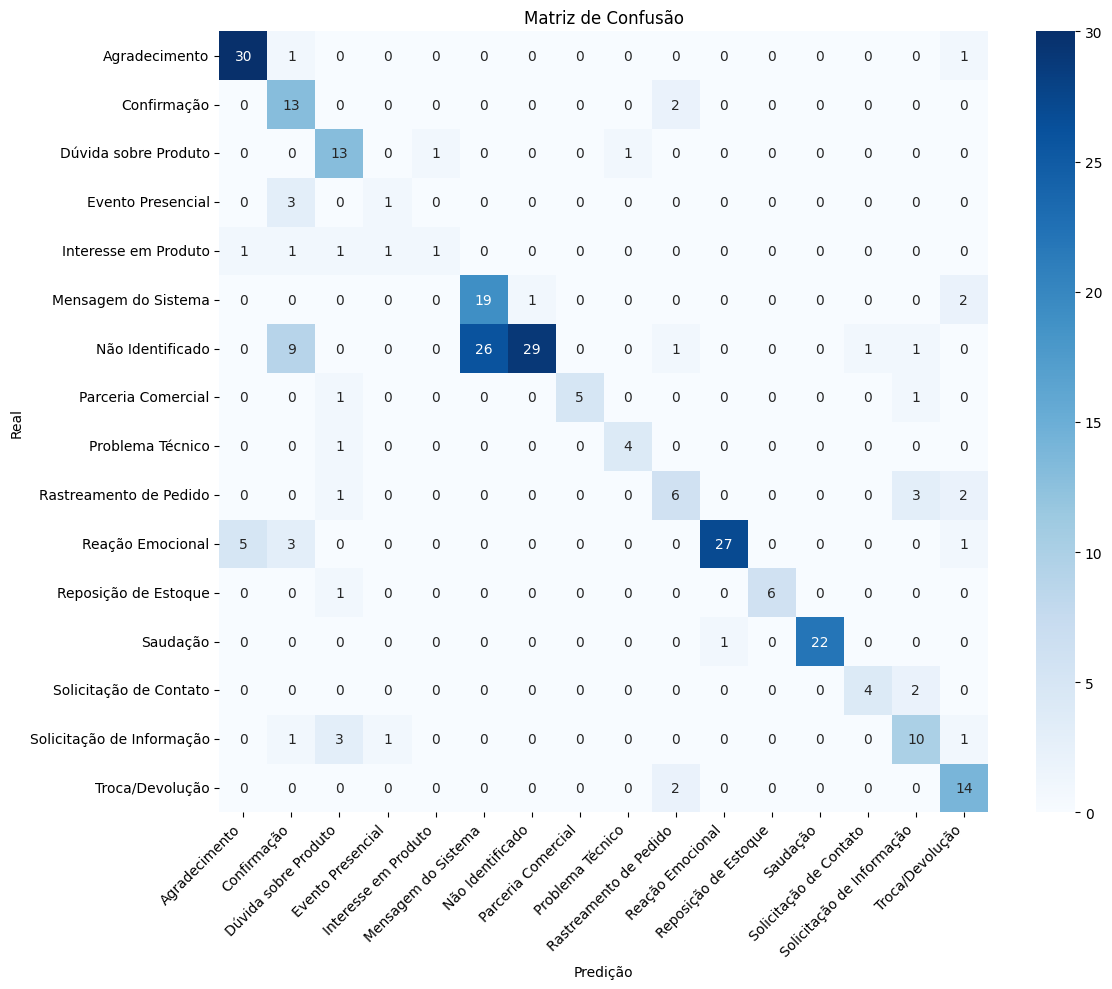


Análise de erros (84 exemplos):
   Real: Dúvida sobre Produto
   Predito: Problema Técnico

   Real: Mensagem do Sistema
   Predito: Troca/Devolução

   Real: Interesse em Produto
   Predito: Dúvida sobre Produto

   Real: Interesse em Produto
   Predito: Evento Presencial

   Real: Não Identificado
   Predito: Mensagem do Sistema


=== COMPARAÇÃO DOS MODELOS ===
Acurácia Random Forest: 0.674
Acurácia SVM: 0.708
Melhor modelo: SVM

=== SALVAMENTO DOS MODELOS ===
Modelo salvo em: modelo_random_forest.pkl
Modelo SVM salvo em: modelo_svm.pkl

=== TESTE DOS PIPELINES ===

Mensagem: 'Bom dia, como posso ser ajudado?'
Random Forest: Solicitação de Informação (conf: 0.275)
SVM: Solicitação de Informação (conf: 0.698)

Mensagem: 'Tem esse produto no tamanho P?'
Random Forest: Dúvida sobre Produto (conf: 0.290)
SVM: Dúvida sobre Produto (conf: 0.728)

Mensagem: 'Muito obrigada pela ajuda!'
Random Forest: Agradecimento (conf: 0.765)
SVM: Agradecimento (conf: 0.982)

Mensagem: 'Onde estÁ meu ped

In [62]:
def main():
    """Função principal que executa o pipeline completo."""

    # 1. Carregar e analisar dados
    print("=== CARREGAMENTO E ANÁLISE DOS DADOS ===")
    df = carregar_dados_taxonomia()
    analisar_dataset(df)

    # 2. Gerar embeddings
    print("\n=== GERAÇÃO DE EMBEDDINGS ===")
    gerador = GeradorEmbeddings()
    X_embeddings = gerador.gerar_embeddings_lote(df['mensagem'].tolist())
    y = df['categoria'].values

    print(f"Shape dos embeddings: {X_embeddings.shape}")
    print(f"Número de classes: {len(np.unique(y))}")

    # 3. Dividir dados
    print("\n=== DIVISÃO DOS DADOS ===")
    X_train, X_test, y_train, y_test = train_test_split(
        X_embeddings, y, test_size=0.2, random_state=42, stratify=y
    )
    print(f"Treino: {X_train.shape[0]} exemplos")
    print(f"Teste: {X_test.shape[0]} exemplos")

    # 4. Treinar Random Forest
    print("\n=== TREINAMENTO RANDOM FOREST ===")
    classificador_rf = ClassificadorIntencoesRandomForest(n_estimators=200)
    metricas_rf = classificador_rf.treinar(X_train, y_train)

    # 5. Treinar SVM
    print("\n=== TREINAMENTO SVM ===")
    classificador_svm = ClassificadorIntencoesSVM()
    metricas_svm = classificador_svm.treinar(X_train, y_train)

    # 6. Avaliar Random Forest
    print("\n=== AVALIAÇÃO RANDOM FOREST ===")
    y_pred_rf = classificador_rf.predizer(X_test)
    avaliar_modelo(y_test, y_pred_rf, classificador_rf.classes_)

    # 7. Avaliar SVM
    print("\n=== AVALIAÇÃO SVM ===")
    y_pred_svm = classificador_svm.predizer(X_test)
    avaliar_modelo(y_test, y_pred_svm, classificador_svm.classes_)

    # 8. Comparar modelos
    print("\n=== COMPARAÇÃO DOS MODELOS ===")
    acc_rf = accuracy_score(y_test, y_pred_rf)
    acc_svm = accuracy_score(y_test, y_pred_svm)
    print(f"Acurácia Random Forest: {acc_rf:.3f}")
    print(f"Acurácia SVM: {acc_svm:.3f}")

    melhor_modelo = "Random Forest" if acc_rf > acc_svm else "SVM"
    print(f"Melhor modelo: {melhor_modelo}")

    # 9. Salvar modelos
    print("\n=== SALVAMENTO DOS MODELOS ===")
    classificador_rf.salvar_modelo('modelo_random_forest.pkl')
    classificador_svm.salvar_modelo('modelo_svm.pkl')

    # 10. Testar pipeline com ambos
    print("\n=== TESTE DOS PIPELINES ===")
    pipeline_rf = PipelineClassificacaoIntencoes(gerador, classificador_rf)
    pipeline_svm = PipelineClassificacaoIntencoes(gerador, classificador_svm)

    exemplos_teste = [
        "Bom dia, como posso ser ajudado?",
        "Tem esse produto no tamanho P?",
        "Muito obrigada pela ajuda!",
        "Onde estÁ meu pedido?",
        "Quero trocar esse produto"
    ]

    for exemplo in exemplos_teste:
        resultado_rf = pipeline_rf.classificar_mensagem(exemplo)
        resultado_svm = pipeline_svm.classificar_mensagem(exemplo)

        print(f"\nMensagem: '{exemplo}'")
        print(f"Random Forest: {resultado_rf['intencao_legivel']} (conf: {resultado_rf['confianca']:.3f})")
        print(f"SVM: {resultado_svm['intencao_legivel']} (conf: {resultado_svm['confianca']:.3f})")


if __name__ == "__main__":
    main()

# Análise e Justificativa dos Resultados - SPRINT 2

## RESUMO EXECUTIVO
- SVM superou Random Forest em todas as métricas principais
- Performance geral: moderada (~70% acurácia)
- Problemas significativos identificados que limitam performance

## COMPARAÇÃO QUANTITATIVA

### Métricas Principais
| Métrica              | Random Forest | SVM    | Diferença |
|---------------------|---------------|--------|-----------|
| Acurácia            | 67.4%         | 70.8%  | +3.4%     |
| Acurácia Balanceada | 58.3%         | 69.8%  | +11.5%    |
| Kappa Score         | 0.636         | 0.680  | +0.044    |
| F1-Score Macro      | 0.579         | 0.681  | +0.102    |
| F1-Score Weighted   | 0.662         | 0.709  | +0.047    |

### Validação Cruzada
| Modelo         | CV Accuracy | Desvio Padrão |
|----------------|-------------|---------------|
| Random Forest  | 66.7%       | ±1.9%         |
| SVM            | 67.0%       | ±2.0%         |

## ANÁLISE POR CATEGORIAS

### Classes com Performance Crítica (F1 < 0.30)
**Random Forest:**
- evento_presencial: 0.00 (falhou completamente)
- interesse_produto: 0.00 (falhou completamente)  
- rastreamento_pedido: 0.33 (performance baixa)

**SVM:**
- evento_presencial: 0.29 (ainda problemática)
- interesse_produto: 0.29 (ainda problemática)

### Classes com Boa Performance (F1 > 0.80)
**Ambos os modelos:**
- agradecimento: RF 0.83, SVM 0.88
- reacao_emocional: RF 0.84, SVM 0.84
- saudacao: RF 0.90, SVM 0.98

## PROBLEMAS IDENTIFICADOS

### 1. DESBALANCEAMENTO SEVERO DO DATASET
```
nao_identificado: 333 exemplos (23%)
vs
evento_presencial: 19 exemplos (1.3%)
```
**Impacto:** Classes minoritárias têm dados insuficientes para aprendizado adequado.

### 2. QUALIDADE DOS DADOS QUESTIONÁVEL
**Evidências:**
- Categoria "não_identificado" é a mais frequente (23%)
- Exemplos vagos: "qual foi a mensagem?", "na verdade foi o porteiro, rs!"
- Mensagens de 1 caractere presentes no dataset

### 3. BAIXA CONFIANÇA NAS PREDIÇÕES (Random Forest)
```
Exemplos de baixa confiança:
- "Onde está meu pedido?": 14.5% confiança
- "Tem esse produto no tamanho P?": 29.0% confiança
```

### 4. CONFUSÃO ENTRE CLASSES SEMANTICAMENTE PRÓXIMAS
**Erros frequentes:**
- Dúvida sobre Produto ↔ Problema Técnico
- Interesse em Produto ↔ Dúvida sobre Produto
- Mensagem do Sistema ↔ Troca/Devolução

## INTERPRETAÇÃO DA PERFORMANCE

### Por que SVM foi Superior?
1. **Melhor handling do desbalanceamento:** Acurácia balanceada 11.5% maior
2. **Maior confiança:** Predições mais assertivas (0.857 vs 0.275)
3. **Normalização de features:** StandardScaler otimiza embeddings para SVM

### Limitações Atuais
1. **Acurácia balanceada < 70%** indica dificuldade real do modelo
2. **6 classes com < 30 exemplos** cada uma
3. **Dataset total pequeno** (1439 exemplos / 16 classes = 90 exemplos/classe)

## DIAGNÓSTICO TÉCNICO

### Força dos Embeddings BERT
- Shape (1439, 768): Vetorização adequada
- Processamento GPU eficiente
- Modelo neuralmind otimizado para português

### Limitações do Classificador
- **Random Forest:** Overfitting aparente (baixa confiança)
- **SVM:** Melhor generalização, mas ainda limitado pelos dados

## CONCLUSÕES OBJETIVAS

### O que Funcionou
- Pipeline técnico está implementado corretamente
- SVM demonstrou superioridade consistente
- Classes balanceadas (agradecimento, saudação) têm boa performance

### O que Não Funcionou
- 37.5% das classes têm F1 < 0.60 (6/16 classes críticas)
- Desbalanceamento compromete performance geral
- Dataset insuficiente para problema multiclasse complexo

### Status para Sprint 2/5
**Performance atual:** Funcional mas não robusta
**Viabilidade:** Proof-of-concept estabelecido
**Limitações críticas:** Dados, não arquitetura



In [63]:
print("Estamos juntos!")

Estamos juntos!
